# Data analysis of "Suzanne Friterie"
In this report we will try to clean the dataset and answer the question that were at the origin of this analysis.

## Objectives
In agreement with the owner of the truckfood we are searching for the best days for opening and which product have the best return on investissement(ROI).

## Collect of Data
First the collect of data was made by gathering bills from the owner. Then they were put in a CSV file to be manipulated with all the tools of data analysis at my disposal.

## Cleaning of data
We put the data in a dataframe and with the help of pandas we will try deal with the null-values due to lack of information in the sources.

In [1]:
#Import the main libraries for data cleaning
import numpy as np
import pandas as pd 
import seaborn as sns
%matplotlib inline

In [2]:
#Importing the CSV file into a Dataframe
df = pd.read_csv('DataFrite.csv')
df.head()

,Date,Time,Petite Frite,Moyenne Frite,Grande Frite,Burger,valeur petite frite,valeur moyenne frite,valeur grande frite,valeur burger,valeur commande
0,09/02/2020,18:45,0,0,1,2,0,0,4,12,16
1,09/02/2020,18:45,0,1,0,2,0,3,0,12,15
2,09/02/2020,19:25,0,2,2,0,0,6,8,0,14
3,09/02/2020,19:30,0,2,0,1,0,6,0,6,12
4,09/02/2020,19:45,0,0,1,2,0,0,4,12,16


In [3]:

df = df.drop(['valeur petite frite', 'valeur moyenne frite', 'valeur grande frite', 'valeur burger'], axis=1)
df

,Date,Time,Petite Frite,Moyenne Frite,Grande Frite,Burger,valeur commande
0,09/02/2020,18:45,0,0,1,2,16
1,09/02/2020,18:45,0,1,0,2,15
2,09/02/2020,19:25,0,2,2,0,14
3,09/02/2020,19:30,0,2,0,1,12
4,09/02/2020,19:45,0,0,1,2,16
...,...,...,...,...,...,...,...
659,20/06/2020,NaN,0,4,0,0,12
660,20/06/2020,NaN,0,0,1,0,4
661,20/06/2020,NaN,0,0,0,8,48
662,20/06/2020,NaN,0,0,1,0,4


In [4]:
df.columns = ['Date', 'Time', 'Small Fries', 'Medium Fries', 'Big Fries', 'Burger', 'Total Price']
df

,Date,Time,Small Fries,Medium Fries,Big Fries,Burger,Total Price
0,09/02/2020,18:45,0,0,1,2,16
1,09/02/2020,18:45,0,1,0,2,15
2,09/02/2020,19:25,0,2,2,0,14
3,09/02/2020,19:30,0,2,0,1,12
4,09/02/2020,19:45,0,0,1,2,16
...,...,...,...,...,...,...,...
659,20/06/2020,NaN,0,4,0,0,12
660,20/06/2020,NaN,0,0,1,0,4
661,20/06/2020,NaN,0,0,0,8,48
662,20/06/2020,NaN,0,0,1,0,4


## Analysis of the differents Products
First the correlation between products, and the correlation with the total basket price.

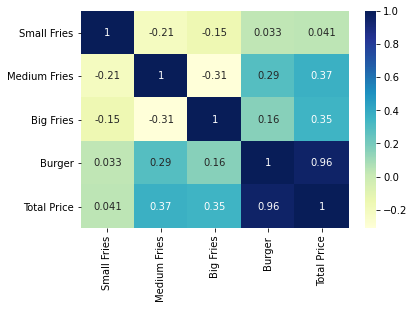

In [5]:
dfplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

We can see clearly a correlation between the total price and the fact that someone buy a burger, Fries have no correlation between them and the intention of buying a burger.

# Analysis of the importance of the day
We are looking for the day the more profitable for the company.


In [6]:
#transform the date into a day of the week
df['Date'] = pd.to_datetime(df['Date'])
df['Day of Week'] = df['Date'].apply(lambda time: time.day_name())
df.head()

,Date,Time,Small Fries,Medium Fries,Big Fries,Burger,Total Price,Day of Week
0,2020-09-02,18:45,0,0,1,2,16,Wednesday
1,2020-09-02,18:45,0,1,0,2,15,Wednesday
2,2020-09-02,19:25,0,2,2,0,14,Wednesday
3,2020-09-02,19:30,0,2,0,1,12,Wednesday
4,2020-09-02,19:45,0,0,1,2,16,Wednesday


In [7]:
#Pivot table to se precisely the main days which contribute to the revenues
A = df.groupby(['Day of Week'])['Total Price'].count()
A = A.sort_values(ascending = False)
A

Day of Week
Thursday     169
Friday       139
Saturday     119
Sunday       109
Wednesday     59
Tuesday       43
Monday        26
Name: Total Price, dtype: int64

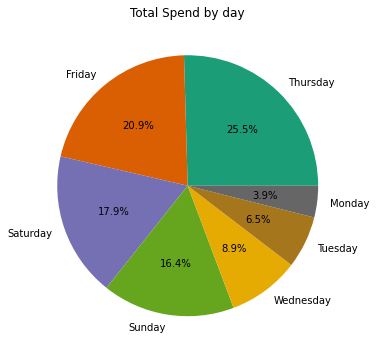

In [8]:
A.plot(kind='pie', x='Day of Week', y='Total Price', title = 'Total Spend by day', 
cmap='Dark2', autopct="%.1f%%", figsize = (10,6), legend=False, ylabel='');

## Analysis of the importance of the hour
We are looking for the bests hours for the company to earn money.

In [9]:
#We search for values of time
df2 = df.dropna()
df2

,Date,Time,Small Fries,Medium Fries,Big Fries,Burger,Total Price,Day of Week
0,2020-09-02,18:45,0,0,1,2,16,Wednesday
1,2020-09-02,18:45,0,1,0,2,15,Wednesday
2,2020-09-02,19:25,0,2,2,0,14,Wednesday
3,2020-09-02,19:30,0,2,0,1,12,Wednesday
4,2020-09-02,19:45,0,0,1,2,16,Wednesday
...,...,...,...,...,...,...,...,...
654,2020-06-20,19:00,2,0,0,2,16,Saturday
655,2020-06-20,19:30,1,0,1,2,18,Saturday
656,2020-06-20,19:35,0,0,1,0,4,Saturday
657,2020-06-20,20:00,0,0,1,3,22,Saturday


<AxesSubplot:title={'center':'Money spend by hours'}, xlabel='Time'>

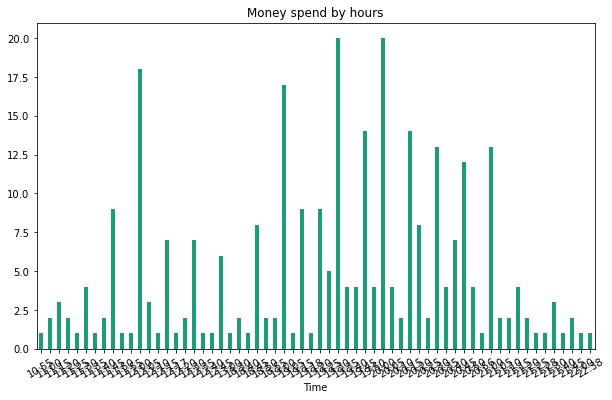

In [10]:
#looking for the best timing zones for purchases
B = df2.groupby(['Time'])['Total Price'].count()
B.plot(kind='bar', title = 'Money spend by hours', figsize = (10,6), cmap='Dark2', rot = 30)

When looking for the best hours for the purchases we end up with too much infos, so we filter it.

In [11]:
#Looking for the best times for purchases
B = B.sort_values(ascending = False)
B.head()

Time
20:00    20
19:30    20
12:00    18
19:00    17
20:15    14
Name: Total Price, dtype: int64

<AxesSubplot:title={'center':'Money spend by hours'}, ylabel='Total Price'>

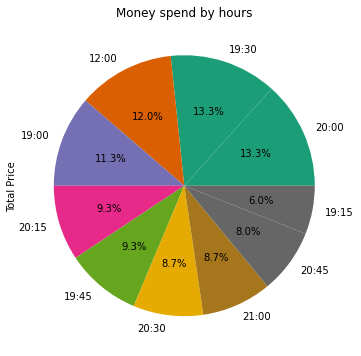

In [12]:
B.head(10).plot(kind='pie',  autopct="%.1f%%",title = 'Money spend by hours', figsize = (10,6), cmap='Dark2', rot = 30)

We can conclude that the best times for purchases are 20h00, 19h30, 12h00, 19h00 and 20h15.

# Conclusions

In the first part we saw that the number of burger sold is the only thing important for the total price of a purchase. Some weak connections between items can be seen, like if someone bought a size of fries he will not buy another size.

Then we saw the best days to sell, but there is a huge bias here. Indeed the data is not collected in a homogeneous way in the time.

Finally we defined the best hours for the company to be open. And this describe a huge tendancy aroud 19h45.